In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import jedi
%matplotlib inline

In [ ]:
pre = "/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy"
folder_list = glob.glob(pre+"/*")

In [ ]:
folder_list = [
   '/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy/rg_0.4_lipid_2_extended',
    '/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy/rg_0.4_lipid_2_topology'
]
dis_list = np.linspace(30, 130, 51)

In [ ]:
pre = '/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy/rg_0.4_lipid_2_topology'

In [ ]:
def process_data(folder, dis):
    location = folder + "/simulation/dis_{}/0/".format(dis)
    #     print(location)
    all_lipid_list = []
    for i in range(4):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(4):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(4):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T0', 'T1', 'T2', 'T3'], value_name="Run", var_name="Temp")

    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    t350 = t4.query('Temp=="T0" & Step > 1e7')
    t350.to_csv(location+"t350.dat", sep=' ', index=False, header=False)
    t400 = t4.query('Temp=="T1" & Step > 1e7')
    t400.to_csv(location+"t400.dat", sep=' ', index=False, header=False)
    t450 = t4.query('Temp=="T2" & Step > 1e7')
    t450.to_csv(location+"t450.dat", sep=' ', index=False, header=False)
    t4.query('Temp=="T3" & Step > 1e7').to_csv(location+"t500.dat", sep=' ', index=False, header=False)

In [ ]:
process_data(folder, dis)

In [ ]:
for folder in folder_list:
    for dis in dis_list:
        process_data(folder, dis)

In [ ]:
t350.plot('Step', 'Run')

In [ ]:
t350.plot('Step', 'Qw')

In [ ]:
t350.plot('Step', 'Energy')

In [7]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'd86648c5d',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/weilu/anaconda/lib/python3.6/site-packages/IPython',
 'ipython_version': '6.1.0',
 'os_name': 'posix',
 'platform': 'Darwin-16.7.0-x86_64-i386-64bit',
 'sys_executable': '/Users/weilu/anaconda/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, '
                '13:04:09) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'}


In [9]:
folder = '/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy/rg_0.4_lipid_2_extended'
dis_list = np.linspace(30, 130, 51)
all_dis = []
for dis in dis_list:
    location = folder + "/simulation/dis_{}/0/".format(dis)
    #     print(location)
    all_lipid_list = []
    for i in range(4):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(4):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(4):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T0', 'T1', 'T2', 'T3'], value_name="Run", var_name="Temp")

    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    all_dis.append(t4)
data = pd.concat(all_dis)

In [12]:
data.to_feather("/Users/weilu/Research/data/test_data/test.feather")

ImportError: the feather-format library is not installed
you can install via conda
conda install feather-format -c conda-forge
or via pip
pip install feather-format


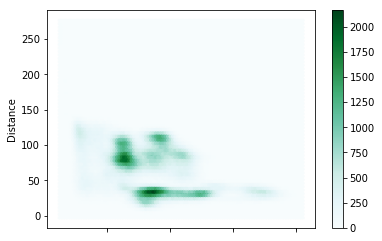

In [15]:
data.plot.hexbin(x='Qw', y='Distance')

In [17]:
['T' + str(i) for i in range(5)]

['T0', 'T1', 'T2', 'T3', 'T4']

In [19]:
def read_temper(n=4, location="."):
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Run", var_name="Temp")

    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    return t4

In [21]:
n= 8
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/higher_temp/simulation/dis_30.0/0/"
data= read_temper(location=location, n=n)

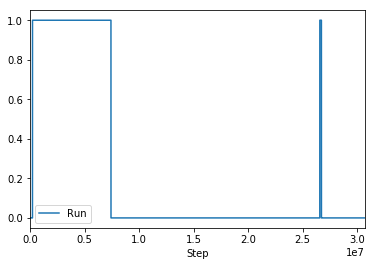

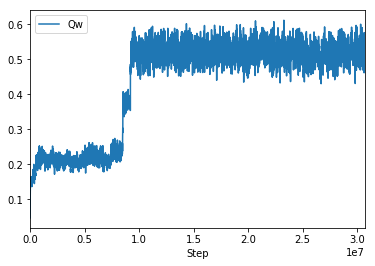

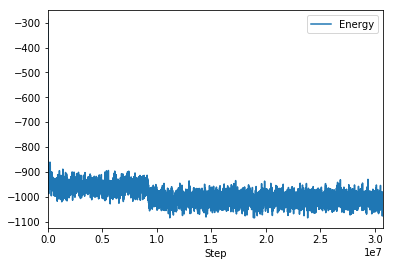

In [67]:
t350 = data.query('Temp=="T0" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

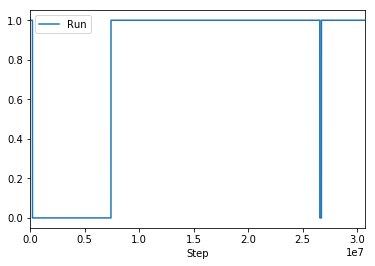

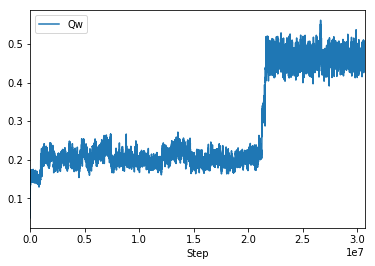

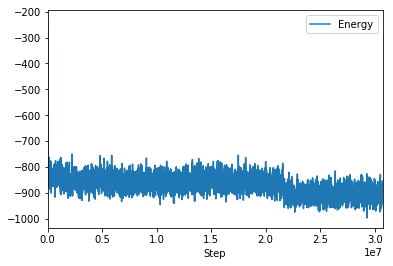

In [68]:
t350 = data.query('Temp=="T1" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

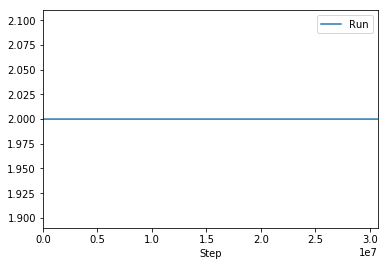

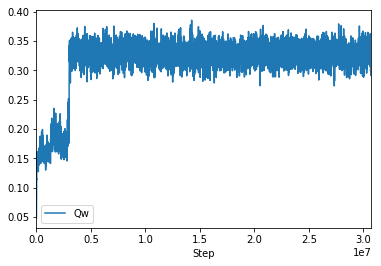

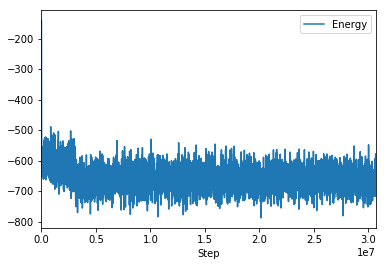

In [62]:
t350 = data.query('Temp=="T2" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

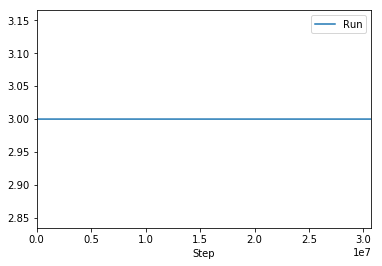

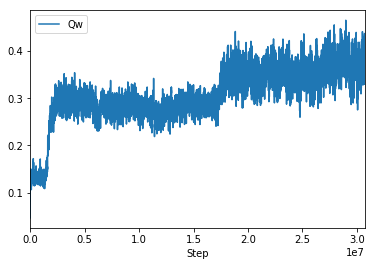

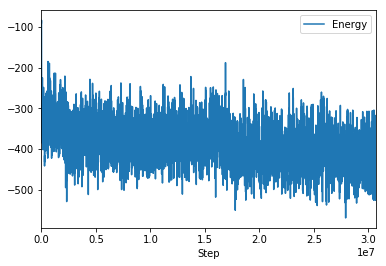

In [69]:
t350 = data.query('Temp=="T3" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

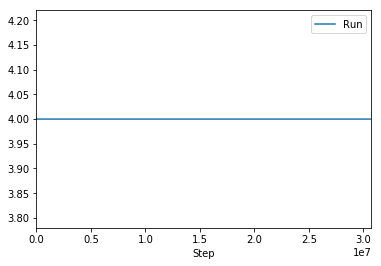

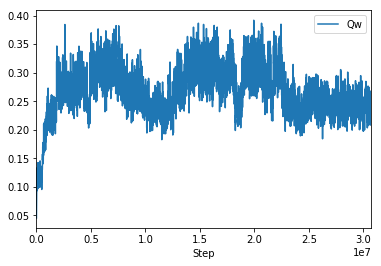

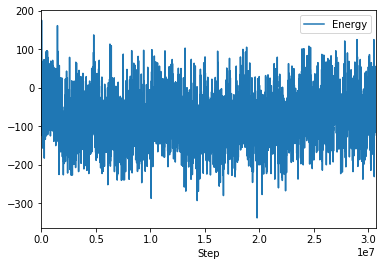

In [61]:
t350 = data.query('Temp=="T4" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

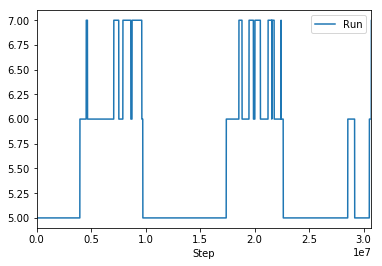

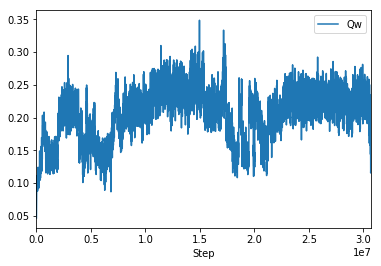

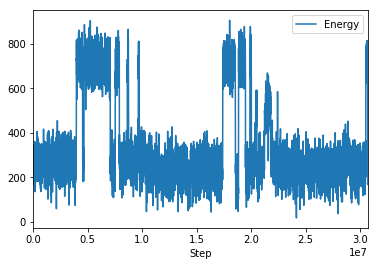

In [60]:
t350 = data.query('Temp=="T5" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

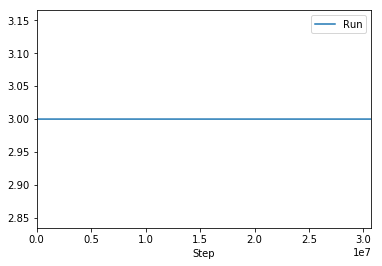

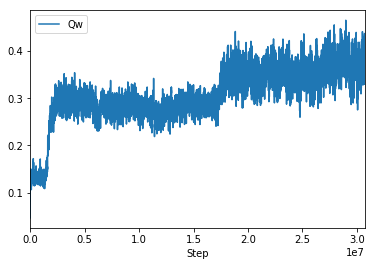

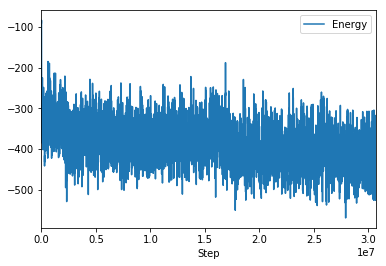

In [41]:
n= 8
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/higher_temp/simulation/dis_80.0/0/"
data2= read_temper(location=location, n=n)

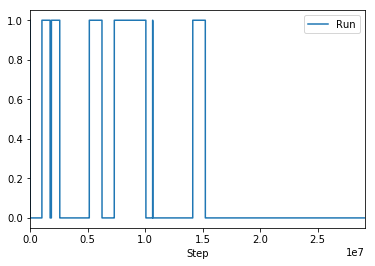

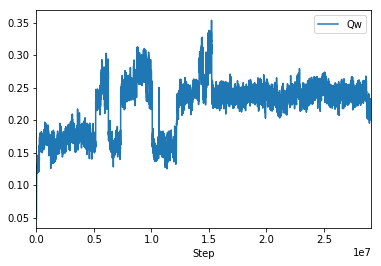

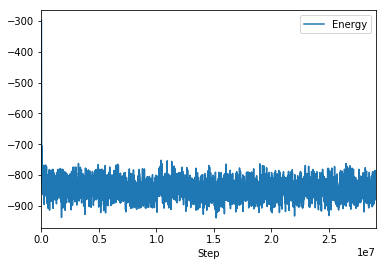

In [58]:
t350 = data2.query('Temp=="T1" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

In [ ]:
t350 = data2.query('Temp=="T1" & Step > 1e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

In [51]:
n= 4
location = "/Users/weilu/Research/server/oct_2017/week_of_oct02/freeEnergy/rg_0.4_lipid_2_extended/simulation/dis_30.0/0/"
data3= read_temper(location=location, n=n)

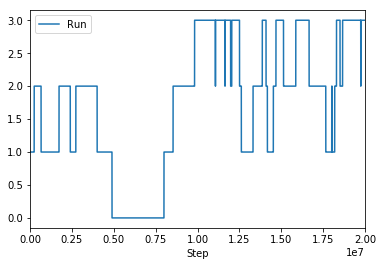

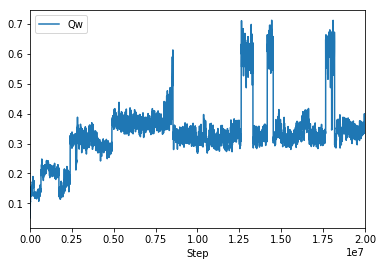

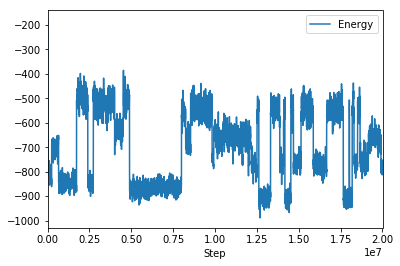

In [66]:
t350 = data3.query('Temp=="T0"')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

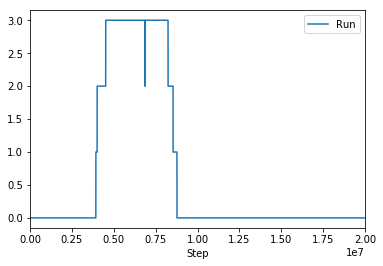

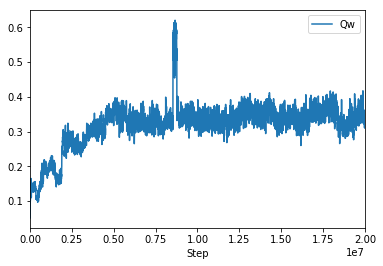

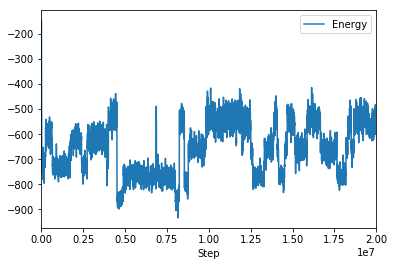

In [65]:
t350 = data3.query('Temp=="T1"')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

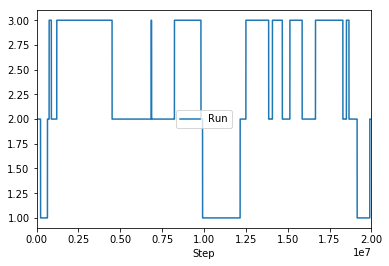

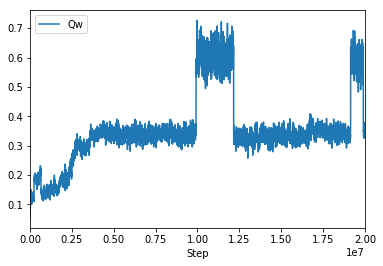

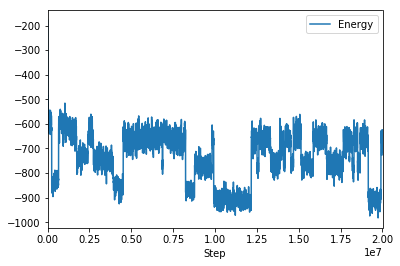

In [64]:
t350 = data3.query('Temp=="T2"')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

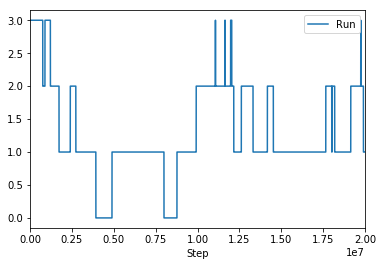

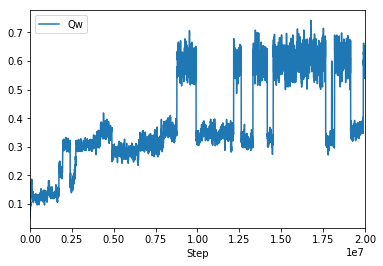

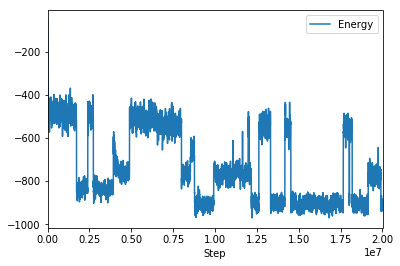

In [70]:
t350 = data3.query('Temp=="T3"')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

In [74]:
t350 = data3.query('Run==0')
t350.plot('Step', 'Temp')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

TypeError: Empty 'DataFrame': no numeric data to plot

In [72]:
data3

,Step,Temp,Run,Qw,Energy,Distance,Lipid,TotalE
0,4000,T0,1,0.051328,-180.561073,241.150081,-0.003150,-180.564223
15,4000,T3,3,0.051168,-52.272277,239.779323,0.257297,-52.014980
14,4000,T3,3,0.051168,-52.272277,239.779323,0.227489,-52.044788
13,4000,T3,3,0.051168,-52.272277,239.779323,0.289218,-51.983059
12,4000,T3,3,0.051168,-52.272277,239.779323,0.024245,-52.248032
10,4000,T1,0,0.051460,-145.509740,240.832594,0.102526,-145.407214
9,4000,T1,0,0.051460,-145.509740,240.832594,0.109315,-145.400426
8,4000,T1,0,0.051460,-145.509740,240.832594,0.013637,-145.496103
11,4000,T1,0,0.051460,-145.509740,240.832594,0.234867,-145.274873
6,4000,T2,2,0.054114,-178.377807,242.690315,0.255513,-178.122295


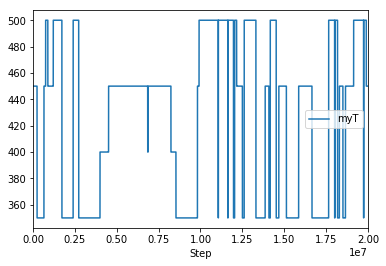

In [87]:
t350 = data3.query('Run==2')
dic = {"T0":350, "T1":400, "T2":450, "T3":500}
t350 = t350.assign(myT = t350['Temp'].map(dic))
t350.plot('Step', 'myT')

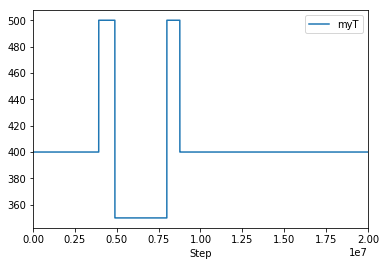

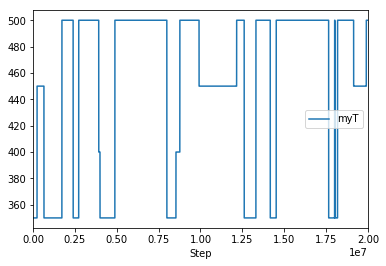

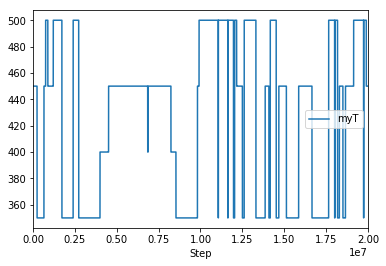

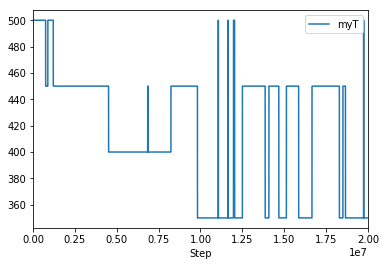

In [90]:
for i in range(4):
    tmp = data3.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT')